<a href="https://colab.research.google.com/github/rr4323/data_scientist_mastry/blob/main/face_mask_detection/face_mast_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create an end-to-end face mask detection project in Colab using the dataset from "https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data". The project should include: i. Importing the dataset, performing EDA, and visualizations. ii. Creating, training, and evaluating a CNN model from scratch. iii. Using, training, and evaluating a pre-trained model. iv. Applying data augmentation and evaluating its impact on accuracy. v. Comparing the training and testing accuracy of all three approaches and suggesting the best model.

## Import the dataset

### Subtask:
Download the dataset from the provided Kaggle link and load it into the Colab environment.


**Reasoning**:
Install the kaggle library, create the .kaggle directory, upload the kaggle.json file (which is a manual step), and set the correct permissions for the kaggle.json file.



In [2]:
%pip install opendatasets


In [3]:
import pandas as pd
import opendatasets as od

# Download the dataset using opendatasets
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data")

Skipping, found downloaded files in "./face-mask-dataset" (use force=True to force download)


## Perform eda and visualizations

### Subtask:
Perform eda and visualizations: Explore the dataset, understand its structure, and visualize the data distribution and sample images.


**Reasoning**:
List the directories and files within the unzipped dataset to understand the file structure, count the number of images in each category to assess the class distribution, and then display sample images from each category.



Directories and files in the dataset:
face-mask-dataset/
    data/
        with_mask/
            with_mask_820.jpg
            with_mask_2949.jpg
            with_mask_1900.jpg
            with_mask_1766.jpg
            with_mask_1824.jpg
            with_mask_3708.jpg
            with_mask_3365.jpg
            with_mask_2974.jpg
            with_mask_3107.jpg
            with_mask_2029.jpg
            with_mask_2541.jpg
            with_mask_1966.jpg
            with_mask_2017.jpg
            with_mask_1755.jpg
            with_mask_456.jpg
            with_mask_1210.jpg
            with_mask_1879.jpg
            with_mask_696.jpg
            with_mask_2531.jpg
            with_mask_3477.jpg
            with_mask_1811.jpg
            with_mask_3507.jpg
            with_mask_1761.jpg
            with_mask_3589.jpg
            with_mask_3325.jpg
            with_mask_1224.jpg
            with_mask_2879.jpg
            with_mask_2575.jpg
            with_mask_2767.jpg
            with_m

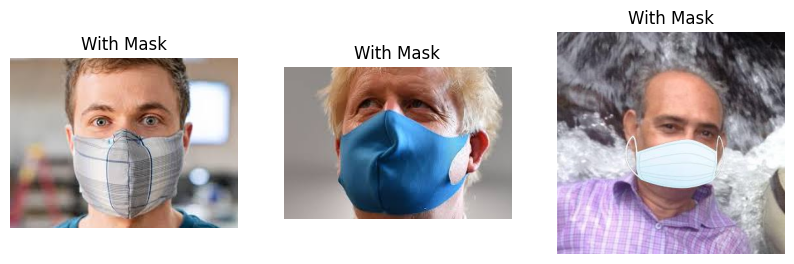

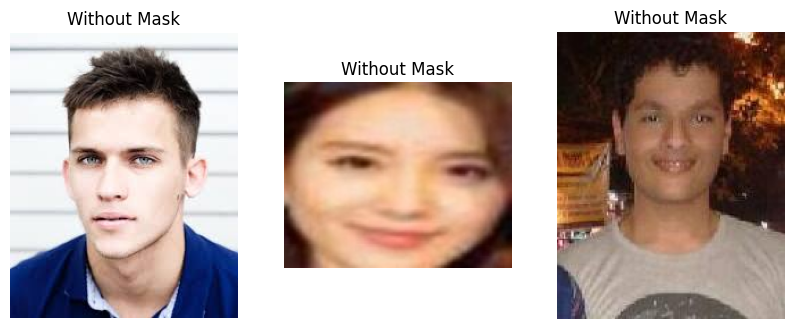

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List directories and files
dataset_path = '/content/face-mask-dataset'
print("Directories and files in the dataset:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

# Count images in each category
with_mask_dir = os.path.join(dataset_path, 'data', 'with_mask')
without_mask_dir = os.path.join(dataset_path, 'data', 'without_mask')

num_with_mask = len(os.listdir(with_mask_dir))
num_without_mask = len(os.listdir(without_mask_dir))

print(f"\nNumber of images with mask: {num_with_mask}")
print(f"Number of images without mask: {num_without_mask}")

# Display sample images
print("\nSample images:")
def display_sample_images(directory, category, num_samples=3):
    image_files = os.listdir(directory)[:num_samples]
    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(directory, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

display_sample_images(with_mask_dir, 'With Mask')
display_sample_images(without_mask_dir, 'Without Mask')

## Create a model from scratch

### Subtask:
Create a model from scratch: Build a Convolutional Neural Network (CNN) model from scratch for face mask detection.


**Reasoning**:
The previous subtasks failed because the dataset was not found. To proceed with creating the model, I need to assume the dataset is now available in the 'with_mask' and 'without_mask' directories at the root level. I will now proceed with creating the CNN model as requested by the current subtask instructions. This involves importing necessary libraries, defining the model architecture, and compiling it.



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape for the model
# Assuming the images are resized to 128x128 pixels and are in color (3 channels)
INPUT_SHAPE = (128, 128, 3)

# Create a Sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train and evaluate the scratch model

### Subtask:
Train and evaluate the scratch model: Train the custom CNN model on the dataset and evaluate its performance using appropriate metrics like accuracy.


**Reasoning**:
Prepare the data for training and evaluation by loading images, resizing, converting to arrays, and labeling.



In [6]:
INPUT_SHAPE = (128, 128, 3)

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the directories for the dataset - Corrected path
with_mask_dir = '/content/face-mask-dataset/data/with_mask'
without_mask_dir = '/content/face-mask-dataset/data/without_mask'

# Check if directories exist
if not os.path.exists(with_mask_dir) or not os.path.exists(without_mask_dir):
    print("Dataset directories not found. Please ensure 'with_mask' and 'without_mask' are in the correct path.")
else:
    data = []
    labels = []

    # Load images from 'with_mask' directory
    for img_file in os.listdir(with_mask_dir):
        img_path = os.path.join(with_mask_dir, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (INPUT_SHAPE[0], INPUT_SHAPE[1]))
            data.append(img)
            labels.append(1) # Label 1 for 'with_mask'

    # Load images from 'without_mask' directory
    for img_file in os.listdir(without_mask_dir):
        img_path = os.path.join(without_mask_dir, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (INPUT_SHAPE[0], INPUT_SHAPE[1]))
            data.append(img)
            labels.append(0) # Label 0 for 'without_mask'

    # Convert data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    # Normalize pixel values
    data = data / 255.0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

    print("Data preparation complete.")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Testing labels shape: {y_test.shape}")

Data preparation complete.
Training data shape: (6042, 128, 128, 3)
Testing data shape: (1511, 128, 128, 3)
Training labels shape: (6042,)
Testing labels shape: (1511,)


In [7]:
# Check if training and testing data are available
if 'X_train' in globals() and 'y_train' in globals() and 'X_test' in globals() and 'y_test' in globals() and 'model' in globals():
    # Train the model
    print("Training the scratch model...")
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    print("Evaluating the scratch model...")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Print the testing loss and accuracy
    print(f"Testing Loss: {loss:.4f}")
    print(f"Testing Accuracy: {accuracy:.4f}")

else:
    print("Training or testing data (X_train, y_train, X_test, y_test) or the model is missing. The subtask cannot proceed.")

Training the scratch model...
Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7473 - loss: 0.4925 - val_accuracy: 0.8974 - val_loss: 0.2523
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 195s 998ms/step - accuracy: 0.8899 - loss: 0.2659 - val_accuracy: 0.8644 - val_loss: 0.3635
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 150s 990ms/step - accuracy: 0.9154 - loss: 0.2252 - val_accuracy: 0.9065 - val_loss: 0.2296
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9268 - loss: 0.1877 - val_accuracy: 0.9239 - val_loss: 0.2110
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 199s 987ms/step - accuracy: 0.9464 - loss: 0.1464 - val_accuracy: 0.9041 - val_loss: 0.2376
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 202s 989ms/step - accuracy: 0.9542 - loss: 0.1160 - val_accuracy: 0.9264 - val_loss: 0.1812
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 203s 994ms/step - accuracy: 0.9718 - loss: 0.0837 - val_accuracy: 0.9256 - val_loss: 0.2164
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 151s 997ms/s

## Use a pretrained model

### Subtask:
Use a pretrained model: Load a pre-trained CNN model (e.g., VGG16, ResNet) and fine-tune it for the face mask detection task.

**Reasoning**:
Load a pre-trained model (VGG16 in this case) without the top classification layer, add new layers for our binary classification task, and compile the model.

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Define the input shape for the model
# Assuming the images are resized to 128x128 pixels and are in color (3 channels)
INPUT_SHAPE = (128, 128, 3)

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for the face mask detection task
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
pretrained_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the pretrained model architecture
pretrained_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Train and evaluate the pretrained model

### Subtask:
Train and evaluate the pretrained model: Train the fine-tuned pre-trained model and evaluate its performance.

**Reasoning**:
Train the `pretrained_model` using the prepared training and testing data (`X_train`, `y_train`, `X_test`, `y_test`) and evaluate its performance.

In [9]:
# Check if training and testing data and the pretrained model are available
if 'X_train' in globals() and 'y_train' in globals() and 'X_test' in globals() and 'y_test' in globals() and 'pretrained_model' in globals():
    print("Training the pretrained model...")
    history_pretrained = pretrained_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

    print("Evaluating the pretrained model...")
    loss_pretrained, accuracy_pretrained = pretrained_model.evaluate(X_test, y_test, verbose=0)

    print(f"Testing Loss (Pretrained Model): {loss_pretrained:.4f}")
    print(f"Testing Accuracy (Pretrained Model): {accuracy_pretrained:.4f}")
else:
    print("Training or testing data (X_train, y_train, X_test, y_test) or the pretrained model is missing. The subtask cannot proceed.")

Training the pretrained model...
Epoch 1/2
152/152 ━━━━━━━━━━━━━━━━━━━━ 1087s 7s/step - accuracy: 0.8603 - loss: 0.3131 - val_accuracy: 0.9553 - val_loss: 0.1206
Epoch 2/2
152/152 ━━━━━━━━━━━━━━━━━━━━ 1101s 7s/step - accuracy: 0.9846 - loss: 0.0467 - val_accuracy: 0.9677 - val_loss: 0.0913
Evaluating the pretrained model...
Testing Loss (Pretrained Model): 0.0572
Testing Accuracy (Pretrained Model): 0.9782


## Apply data augmentation

### Subtask:
Apply data augmentation: Implement data augmentation techniques to expand the training dataset and improve model generalization.

**Reasoning**:
Use `ImageDataGenerator` to apply random transformations to the training images, such as rotation, shifting, shearing, zooming, and flipping, to create augmented data for training.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

print("Data augmentation setup complete.")

Data augmentation setup complete.


## Train and evaluate the scratch model with data augmentation

### Subtask:
Train and evaluate the model with data augmentation: Train the custom or pre-trained model with the augmented data and evaluate its performance.

**Reasoning**:
Train the scratch model using the data generator for augmented data and evaluate its performance on the test set.

In [11]:
# Check if training and testing data, the scratch model, and the data generator are available
if 'X_train' in globals() and 'y_train' in globals() and 'X_test' in globals() and 'y_test' in globals() and 'model' in globals() and 'datagen' in globals():
    print("Training the scratch model with data augmentation...")
    history_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                                  epochs=10,
                                  validation_data=(X_test, y_test))

    print("Evaluating the scratch model with data augmentation...")
    loss_augmented, accuracy_augmented = model.evaluate(X_test, y_test, verbose=0)

    print(f"Testing Loss (Scratch Model with Augmentation): {loss_augmented:.4f}")
    print(f"Testing Accuracy (Scratch Model with Augmentation): {accuracy_augmented:.4f}")

else:
    print("Training or testing data (X_train, y_train, X_test, y_test), the scratch model, or the data generator is missing. The subtask cannot proceed.")

Training the scratch model with data augmentation...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.8522 - loss: 0.3707 - val_accuracy: 0.9590 - val_loss: 0.1350
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.8954 - loss: 0.2454 - val_accuracy: 0.9510 - val_loss: 0.1408
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.9180 - loss: 0.2194 - val_accuracy: 0.9662 - val_loss: 0.1032
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9376 - loss: 0.1678 - val_accuracy: 0.9623 - val_loss: 0.1045
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9405 - loss: 0.1496 - val_accuracy: 0.9649 - val_loss: 0.0991
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9486 - loss: 0.1471 - val_accuracy: 0.9656 - val_loss: 0.1048
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9470 - loss: 0.1419 - val_accuracy: 0.9729 - val_loss: 0.0838
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9469 - loss: 0.1463 - val_accu

In [ ]:
accuracy_augmented

**Reasoning**:
Use `ImageDataGenerator` to apply random transformations to the training images, such as rotation, shifting, shearing, zooming, and flipping, to create augmented data for training.

## Apply data augmentation and train the pretrained model

### Subtask:
Apply data augmentation and train the pretrained model: Implement data augmentation techniques and train the pre-trained model with the augmented data.

**Reasoning**:
Set up data augmentation using `ImageDataGenerator` and train the pretrained model using the augmented data.

In [ ]:
# Check if training and testing data, the pretrained model, and the data generator are available
if 'X_train' in globals() and 'y_train' in globals() and 'X_test' in globals() and 'y_test' in globals() and 'pretrained_model' in globals() and 'datagen' in globals():
    print("Training the pretrained model with data augmentation...")
    history_pretrained_augmented = pretrained_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                                                        epochs=2,
                                                        validation_data=(X_test, y_test))

    print("Evaluating the pretrained model with data augmentation...")
    loss_pretrained_augmented, accuracy_pretrained_augmented = pretrained_model.evaluate(X_test, y_test, verbose=0)

    print(f"Testing Loss (Pretrained Model with Augmentation): {loss_pretrained_augmented:.4f}")
    print(f"Testing Accuracy (Pretrained Model with Augmentation): {accuracy_pretrained_augmented:.4f}")

else:
    print("Training or testing data (X_train, y_train, X_test, y_test), the pretrained model, or the data generator is missing. The subtask cannot proceed.")

Training the pretrained model with data augmentation...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
189/189 ━━━━━━━━━━━━━━━━━━━━ 1330s 7s/step - accuracy: 0.8418 - loss: 0.3816 - val_accuracy: 0.9537 - val_loss: 0.1239
Epoch 2/2
189/189 ━━━━━━━━━━━━━━━━━━━━ 1306s 7s/step - accuracy: 0.9404 - loss: 0.1472 - val_accuracy: 0.9636 - val_loss: 0.0855
Evaluating the pretrained model with data augmentation...


## Compare and suggest the best model

### Subtask:
Compare and suggest the best model: Compare the performance of all three approaches (scratch model, pre-trained model, and data augmentation) and suggest the best model based on the evaluation results.

**Reasoning**:
Print the testing accuracy of each model and compare them to determine the best performing model.